In [1]:
library(openxlsx)

Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


In [27]:
data <- read.xlsx("./新非靶/3.Data/data.xlsx", sheet = 2)

In [28]:
dim(data)

[1] 146  34

In [3]:
colnames(data)

[1] "ID"          "Metabolites" "KO-CLP1"     "KO-CLP2"     "KO-CLP3"    
 [6] "KO-CLP4"     "KO-CLP5"     "KO-CLP6"     "KO-CLP7"     "KO-CLP8"    
[11] "KO-NC1"      "KO-NC2"      "KO-NC3"      "KO-NC4"      "KO-NC5"     
[16] "KO-NC6"      "KO-NC7"      "KO-NC8"      "WT-CLP1"     "WT-CLP2"    
[21] "WT-CLP3"     "WT-CLP4"     "WT-CLP5"     "WT-CLP6"     "WT-CLP7"    
[26] "WT-CLP8"     "WT-NC1"      "WT-NC2"      "WT-NC3"      "WT-NC4"     
[31] "WT-NC5"      "WT-NC6"      "WT-NC7"      "WT-NC8"

In [4]:
data = data[,-1]

In [5]:
library(tibble)

data = as.tibble(data)

data = data[!duplicated(data$Metabolites),]

Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


In [6]:
data = tibble::column_to_rownames(data,'Metabolites')

In [7]:
data_t = t(data)

In [8]:
data_t = data.frame(data_t)

In [9]:
data_t[,2:145] = as.data.frame(lapply(data_t[,2:145],as.numeric))

In [10]:
head(data_t,3)

,Metabolites,Taurodeoxycholic.acid,Tauroursodeoxycholic.acid,Taurocholic.acid,Glycocholic.acid,Ursodeoxycholic.acid,Taurochenodesoxycholic.acid,Glycoursodeoxycholic.acid,Cholic.acid,Chenodeoxycholic.acid.glycine.conjugate,⋯,PA.16.0.18.1.,PE.14.0.,PI.16.0.,PS.16.0.,PI.16.0.18.1.9Z..,PI.18.0.20.4.5Z.8Z.11Z.14Z..,X18.0.18.1.PS,X16.0.PE,PI.18.0.,PG.18.0.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KO-CLP1,KO-CLP,32205423,56056895,496071913,371757.0,9050243,51788885,166724.2,53880309,9136.261,⋯,208678752,3130269,0,859121.7,775305.19,3420613,0,4167122,0,0
KO-CLP2,KO-CLP,88058270,73887354,457156989,377164.8,6064914,26529953,165101.3,27067753,9515.255,⋯,199946110,4139600,0,644527.5,1050344.87,30237886,0,3004333,0,0
KO-CLP3,KO-CLP,357492587,236550470,424363840,3625828.0,7745818,115077527,840442.5,24938485,47915.191,⋯,209066864,1480697,0,287849.8,51461.07,3494120,0,2848940,0,0


In [11]:
count = aggregate(data_t[,2:145],list(data_t[,1]),mean)

In [17]:
head(count_t,2)

,KO-CLP,KO-NC,WT-CLP,WT-NC
,<dbl>,<dbl>,<dbl>,<dbl>
Taurodeoxycholic.acid,133933072,115558349,113019390,98769217
Tauroursodeoxycholic.acid,109601571,50817122,102246987,50534753


In [14]:
count = tibble::column_to_rownames(count,'Group.1')

In [15]:
count_t = as.data.frame(t(count))

In [18]:
name <- read.xlsx("./新非靶/3.Data/data.xlsx", sheet = 2)

In [19]:
name = name[-1,-1]

In [20]:
library(tibble)

name = as.tibble(name)

name = name[!duplicated(name$Metabolites),]

In [21]:
rownames(count_t) = name$Metabolites

In [22]:
 metebolite = rownames_to_column(count_t,'Metabolites')

In [23]:
cnumber = read.csv('/data/workdirV6/cnumber2.csv')

In [24]:
head(cnumber,2)

,Metabolites,kegg
,<chr>,<chr>
1,Taurodeoxycholic acid,No result
2,Tauroursodeoxycholic acid,C16868


In [26]:
cnumber = cnumber %>% dplyr::filter(kegg != 'No result')
cnumber = cnumber %>% dplyr::filter(kegg != 'undefined')

In [283]:
cnumber3 = read.table('/data/workdirV6/cnumber3.txt',header =T,sep = '\t')

In [296]:
cnumber.new = unique(rbind(cnumber,cnumber3))

In [297]:
head(metebolite,2)

,Metabolites,KO-CLP,KO-NC,WT-CLP,WT-NC
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Taurodeoxycholic acid,133933072,115558349,113019390,98769217
2,Tauroursodeoxycholic acid,109601571,50817122,102246987,50534753


In [298]:
count = dplyr::left_join(cnumber.new,metebolite)

Joining with `by = join_by(Metabolites)`


In [313]:
dim(count)

[1] 94  6

In [314]:
head(count,4)

,Metabolites,kegg,KO-CLP,KO-NC,WT-CLP,WT-NC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Tauroursodeoxycholic acid,C16868,109601570.7,50817122,102246987.3,50534752.8
2,Glycocholic acid,C01921,790222.9,339524,508944.9,386006.5
3,Ursodeoxycholic acid,C07880,10843086.0,20018617,15162107.4,11368462.4
4,Taurochenodesoxycholic acid,C05465,58543591.7,74151466,80204783.9,71041495.6


In [318]:
count = na.omit(count)

In [319]:
pathway = read.csv('/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [320]:
pathway = pathway[,c('PATHWAY_MAP','COMPOUND')]

colnames(pathway) = c('pathwayname','kegg')

pathway = pathway[,c(2,1)]

diffcount = count[,c(2,1,3:6)]

head(diffcount,2)

heat = merge(pathway,diffcount,by = 'kegg')

dim(pathway)

,kegg,Metabolites,KO-CLP,KO-NC,WT-CLP,WT-NC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C16868,Tauroursodeoxycholic acid,109601570.7,50817122,102246987.3,50534752.8
2,C01921,Glycocholic acid,790222.9,339524,508944.9,386006.5


[1] 6244    2

In [321]:
heat = unique(heat)

heat <- heat[!duplicated(heat$kegg), ]

zhu = data.frame(table(heat$pathwayname))
zhu$ID <- as.numeric(rownames(zhu))

In [303]:






library(dplyr)

heat1 = heat %>% filter(pathwayname	 %in% c('Fatty acid biosynthesis'))

heat1=heat[which(rowSums(heat[,4:7]) > 0),]

dim(heat1)

head(heat1,2)

,kegg,Metabolites,KO-CLP,KO-NC,WT-CLP,WT-NC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C16868,Tauroursodeoxycholic acid,109601570.7,50817122,102246987.3,50534752.8
2,C01921,Glycocholic acid,790222.9,339524,508944.9,386006.5


[1] 6244    2

[1] 49  7

,kegg,pathwayname,Metabolites,KO-CLP,KO-NC,WT-CLP,WT-NC
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
49,C00187,Cushing syndrome,Cholesterol,3622301,4604771,4654220,4048221
63,C00219,Linoleic acid metabolism,Arachidonic Acid,394347752,532256115,517996776,572739710


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x

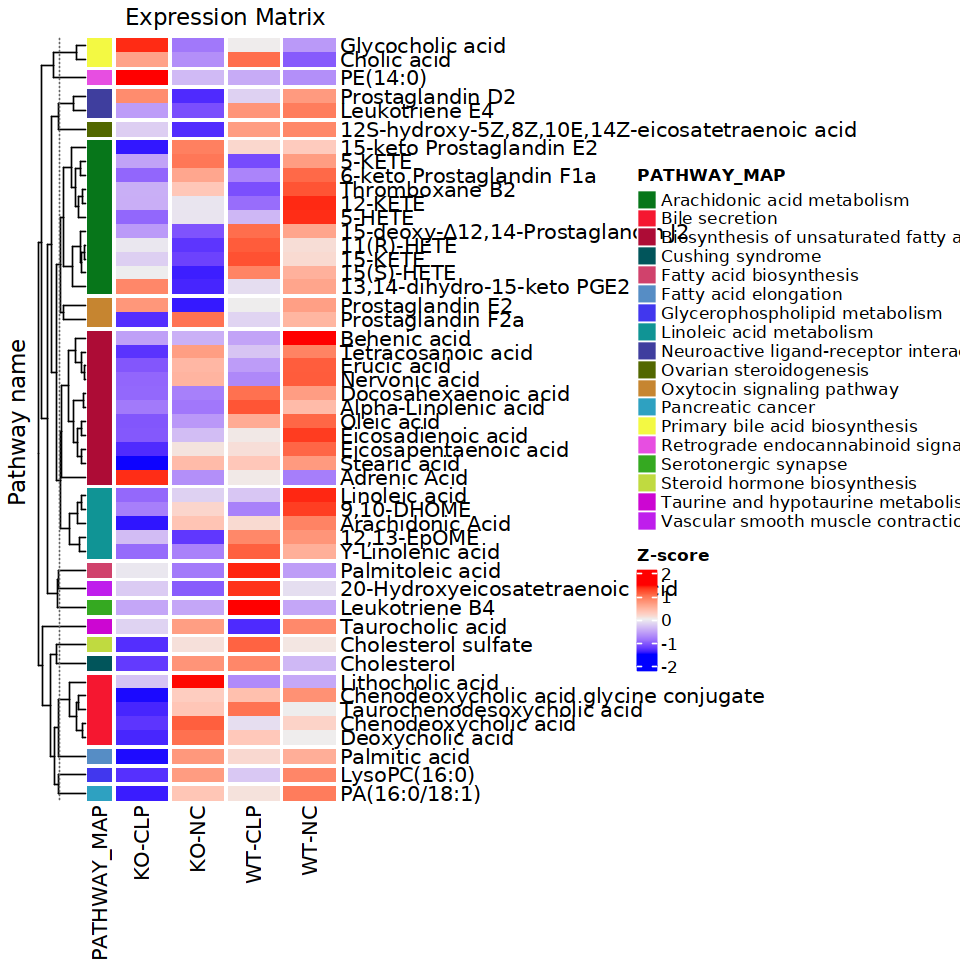

In [307]:
matrix = as.matrix(heat1[1:49,4:7])
library(matrixStats)
matrix = (matrix - rowMeans(matrix))/rowSds(matrix)

rownames(matrix) <- heat1$Metabolites

sample_annotation <- data.frame(
  Type = c(rep('KO_CLP',1),
            rep('KO_NC',1),
           rep('WT_CLP',1),          
           rep('WT_NC',1)
          )
)

rownames(sample_annotation) <- colnames(matrix)

gene_annotation <- data.frame(
  PATHWAY_MAP = heat1$pathwayname
)

gene_annotation$GeneType = gsub(' ','_',gene_annotation$PATHWAY_MAP)

rownames(gene_annotation) <- rownames(matrix)

# row_colors <- list(
#   PathwayName = c(Amino_acid_metabolism = "#FFC0CB", Carbohydrate_metabolism = "#FFB6C9", Lipid_metabolism = "#FF69B4",
#           Metabolism_of_cofactors_and_vitamins = "#1B9E77", Membrane_transport = "#D95F02", Nervous_system = "#7570b3")
# )

# col_colors <- list(
#   Group = c(KO_CLP= "#add8e6", WT_CLP = "#87CEFA", KO_NC = "#4682B4",WT_NC = '#FF69B4')
# )

library(ComplexHeatmap)

ha_col = HeatmapAnnotation(df = sample_annotation)
ha_row = rowAnnotation(PATHWAY_MAP = gene_annotation$PATHWAY_MAP)



p = Heatmap(matrix, # 表达矩阵a
       # top_annotation = ha_col, # 列注释对象
        left_annotation = ha_row,
        
 # 行注释对象
        cluster_rows = TRUE, 
      cluster_columns = FALSE,
        show_row_names = TRUE,
      show_column_names = TRUE,
        column_split = sample_annotation$Type, # 按样本类型分组
        row_split = gene_annotation$PATHWAY_MAP,   # 按基因类型分组
        column_title = "Expression Matrix",
        row_title = "Pathway name ",
            heatmap_legend_param = list(title = 'Z-score'), 
    use_raster = NULL, raster_device = c("png", "jpeg", "tiff", 
        "CairoPNG", "CairoJPEG", "CairoTIFF", "agg_png"), raster_quality = 1
        )

p

In [308]:
options(repr.plot.height = 12,repr.plot.width = 8)

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”


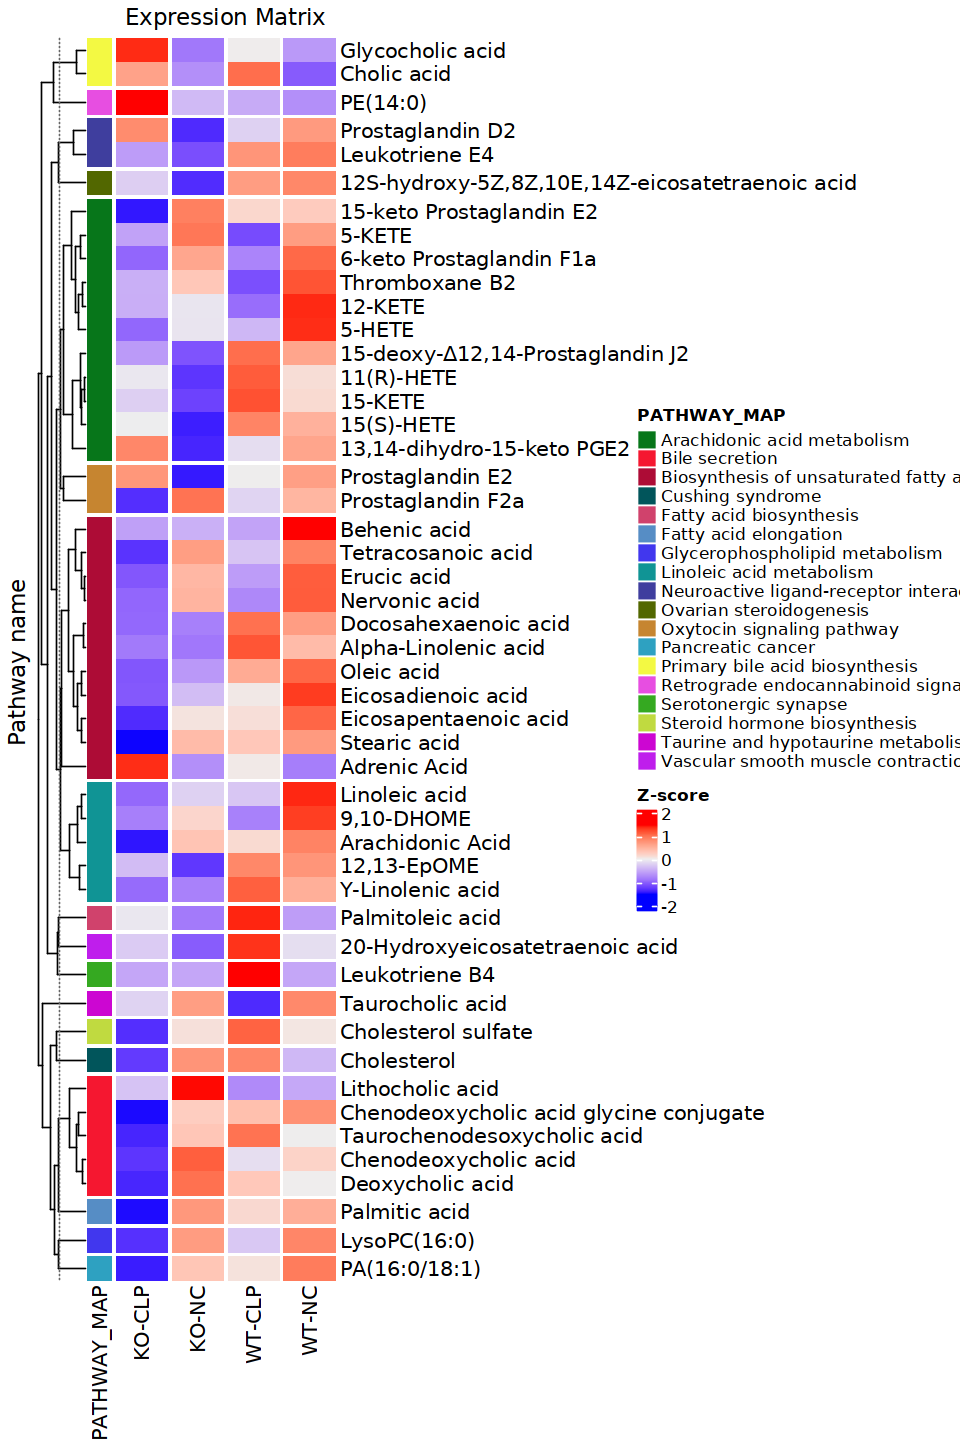

In [309]:
p

In [310]:
pdf('heatmap-zhizhi.pdf',height = 12,width = 8)
print(p)
dev.off()

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <94>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '15-deoxy-Δ12,14-Prostaglandin J2' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

png 
  2